# Totoro Curve
## トトロ曲線, 龍貓曲線


![Totoro Curve](images/totoro_curve.png)


Inspired by persons curve from WolframAlpha, I want to create a "Totoro curve" using Fourier series. You can see examples of "person curves" from the following website:

[Random Person Curve](https://www.wolframalpha.com/input/?i=random+person+curve)

To create a "curves" like this, it might be simpler then you think. The first step is divied the whole curves into several seperated closed curves. For each close curve, we sample some points (x(t), y(t)) from the curve. Then for each curve, we have two associate curves, namely,

$$\{(t, x(t)) \mid t \in [0, 2\pi]\}$$

and 

$$\{(t, y(t)) \mid t \in [0, 2\pi]\}.$$

Finally, we use Fouriers series to approximate these two curves. The whole propress is exaplained in 

[Making Formulas for Everything](http://blog.wolfram.com/2013/05/17/making-formulas-for-everything-from-pi-to-the-pink-panther-to-sir-isaac-newton/)

To learn Fourier series, an excellent book for absolute-beginner with no prerequists whatsoever is "Who is Fourier":

[Who's Fourier](https://www.amazon.com/Who-Fourier-Mathematical-Adventure-2nd/dp/0964350432/ref=sr_1_3?s=books&ie=UTF8&qid=1545280813&sr=1-3)

[フーリエの冒険 (Japanese Origin)](http://amzn.asia/d/7dOSs4O)


<span style="color:red">[warning]</span>
I did this for my course, "Introduction to Mathematics," and I intended to give students an application to Fouriers series. The codes are very, very ugly, and surly you can do a much better work.


這篇我們想要仿 WolframAlpha, 畫 "person curve", 你可以點下面的連結看隨機的示範。

[Random Person Curve](https://www.wolframalpha.com/input/?i=random+person+curve)

原理其實很簡單, 就是一個 curve 不過是 (x(t), y(t)) 一堆點連起來。我們用傅利葉級數分別把 x(t), y(t) 學起來就好! 要學傅利葉級數, 有本完全為初學者設計、連三角函數還有微積分都不需要先會的, 非常棒的一本書 (中文事實上分成兩本):

[數學嗆聲班 (基礎班)](https://www.books.com.tw/products/0010390356)
[數學嗆聲班 (進階班)](https://www.books.com.tw/products/0010390361)

只可惜已絕版!!

本篇是未經整理, 一邊玩一邊寫出來的, 所以多少有點混亂。

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

我們的週期 T 永遠設為 $2\pi$。

In [2]:
T = 2*np.pi

## 傅利葉級數

複習一下、還有各係數如何求出來。

$$ f(t) \sim a_0 + \sum_{n=1}^\infty [a_n\sin(n\omega t) + b_n\cos(n \omega t)]$$

其中

$$\omega = \dfrac{2\pi}{T}$$


#### 假設有 $m$ 個 sample

$$(0, y_0), (1, y_1), (2, y_2), \ldots, (m-1, y_{m-1}), (m, y_0)$$

$$\Delta x = \dfrac{T}{m}$$

#### $a_0$ 計算

$$a_0 = \dfrac{\int_0^T f(t) \, dt}{T}$$

其中的積分的估計

$$\int_0^T f(t) \, dt \simeq \sum_{i=0}^{m-1} f(i\Delta x) \Delta x$$

#### $a_n$ 計算

$$a_n = \dfrac{2\int_0^T f(t) \sin(2n\pi) \, dt}{T}$$

$t=2\pi$ 時,

$$a_n = \dfrac{\int_0^T f(t) \sin(n t)\, dt}{\pi}$$

而

$$\int_0^T f(t) \sin(n t)\simeq \sum_{i=0}^{m-1} f(i\Delta x)\sin(in \Delta x) \Delta x$$

#### $b_n$ 計算

$t=2\pi$ 時,

$$b_n = \dfrac{\int_0^T f(t) \cos(n t)\, dt}{\pi}$$

而

$$\int_0^T f(t) \cos(n t)\simeq \sum_{i=0}^{m-1} f(i\Delta x)\cos(in \Delta x) \Delta x$$

In [3]:
n = 5

### 任意 sample, 用傅利葉級數模擬

我們這裡的目標, 是有任意的 sample, 我們都看成週期是 $2\pi$, 並用傅利葉級數學起來。

In [4]:
def fourier(arr, n=5):
    m = len(arr)
    Δx = T/m
    a0 = (arr*Δx).sum()/T
    iΔx = np.arange(m)*Δx
    niΔx = np.arange(1,n+1).reshape(n,1)@iΔx.reshape(1,m)
    area_a = (arr*np.sin(niΔx)*Δx).sum(axis=1)
    aseq = area_a/np.pi
    # b_n
    area_b = (arr*np.cos(niΔx)*Δx).sum(axis=1)
    bseq = area_b/np.pi
    return a0, aseq, bseq 

這裡
    
    fourier(arr, n)
    
是用 arr 這個 array 當我們的 sample, 然後計算傅利葉級數到 $a_n, b_n$。

回傳有第一個係數 $a_0$, 而 $[a_1, a_2, \ldots, a_n]$ 放入 `aseq`, 同理, b 系列係數放入 `bseq`。

In [5]:
def fser(a0, aseq, bseq, tarr):
    n = len(aseq)
    # 1t, 2t, ..., nt
    n_tarr = tarr * np.arange(1,n+1).reshape(n,1)
    sin_arr = np.sin(n_tarr)
    cos_arr = np.cos(n_tarr)
    f_sin = aseq@sin_arr
    f_cos = bseq@cos_arr
    f_values = a0 + f_sin + f_cos
    return f_values

### 試畫龍貓的身體

在 GeoGebra 5 插入一張龍的圖片, 自己點上點, 並找出座標來, copy 到此。

In [8]:
body = np.array([(-0.559445774106827, 4.19745480486248), (-0.680000000000002, 4.54000000000002), (-0.789877217441435, 4.84946498591291), (-0.961260504072983, 5.14752287570689), (-1.02087208203178, 4.76004761897471), (-1.05067787101118, 4.12667460316245), (-0.879294584379634, 3.98509710551031), (-0.842037348155384, 3.85097105510301), (-1.14754668519423, 3.58271895428841), (-1.49031325845733, 3.07602054163862), (-1.72723368188505, 2.62442718884363), (-2.01266541632888, 2.07951205945086), (-2.28079825777612, 1.52594748355979), (-2.50000000000000, 1.00000000000000), (-2.64407501070463, 0.661002833729994), (-2.74786836868421, 0.332323866794670), (-2.86896061966038, -0.0482517791304404), (-2.92085729865017, -0.394229639062359), (-2.92950674514846, -0.731558052495981), (-2.89490895915527, -1.09483480542450), (-2.80841449417229, -1.38891598636663), (-2.66137390370123, -1.57920380932918), (-2.48838497373527, -1.60515214882408), (-2.44513774124378, -1.89923332976621), (-2.41918940174888, -2.20196395720664), (-2.36729272275910, -2.46144735215558), (-2.26349936477952, -2.70363185410792), (-2.15105656030165, -2.97176469555516), (-1.99536652333228, -3.19665030451090), (-1.82237759336632, -3.43018535996495), (-1.58019309141398, -3.63777207592410), (-1.41585360794632, -3.77616321989687), (-1.04392740851951, -3.82805989888665), (-0.672001209092697, -3.85400823838155), (-0.334672795659075, -3.87130713137814), (-0.0492410612152429, -3.87995657787644), (0.158345654743908, -3.87130713137814), (0.265111993437952, -3.77840043715938), (0.362565845665110, -3.87991486656267), (0.618382207761401, -3.88397544373880), (0.837653375272507, -3.88397544373880), (1.06504569713587, -3.87585428938654), (1.26807455594245, -3.87585428938654), (1.45892168322064, -3.85555140350588), (1.67819285073174, -3.85961198068201), (1.84467651495314, -3.84336967197749), (2.04364479658359, -3.60379561858572), (2.29540058150375, -3.33173694778491), (2.44158135984448, -3.11652635744993), (2.57151982948070, -2.90943692146722), (2.65679195017946, -2.69016575395612), (2.78673041981567, -2.43028881468369), (2.86388138616217, -2.16229072105901), (2.91260831227575, -1.88617147308206), (2.91260831227575, -1.67096088274709), (2.93291119815641, -1.53696183593474), (3.12375832543459, -1.50853779570182), (3.30242372118438, -1.43544740653145), (3.36739295600249, -1.32175124559977), (3.36739295600249, -1.10248007808866), (3.33490833859343, -0.871027179049163), (3.30242372118438, -0.655816588714189), (3.28212083530372, -0.481211770140530), (3.24557564071854, -0.294425220038476), (3.20903044613335, -0.0873357840557650), (3.16030352001978, 0.127874806279209), (3.10751601673007, 0.306540202028999), (3.05878909061649, 0.493326752131053), (2.98975927862225, 0.684173879409239), (2.90854773509962, 0.903445046920345), (2.84357850028151, 1.06992871114174), (2.75424580240662, 1.25265468406766), (2.68115541323625, 1.40695661676066), (2.60806502406588, 1.55313739510140), (2.50655059466259, 1.73180279085119), (2.44158135984448, 1.89016530072032), (2.37661212502638, 2.10537589105529), (2.29540058150375, 2.28404128680508), (2.23855250103790, 2.44240379667422), (2.20000000000000, 2.60000000000000), (2.12079576293009, 2.75506823923635), (2.01522075635067, 2.95403652086680), (1.92994863565190, 3.12864133944045), (1.83249478342475, 3.30730673519024), (1.72285919966919, 3.48191155376390), (1.60000000000000, 3.60000000000000), (1.46704283757290, 3.74178849303632), (1.40000000000000, 3.80000000000000), (1.33304379076056, 3.87578753984867), (1.34116494511282, 3.99354427795648), (1.45080052886838, 4.04227120407006), (1.50836688756588, 4.07995259454146), (1.51944919236638, 4.15752872814498), (1.51944919236638, 4.23371957364844), (1.51252275186607, 4.36393665505435), (1.51113746376601, 4.45536566965852), (1.50698159946582, 4.55095054856285), (1.50698159946582, 4.63129725836650), (1.50265388608306, 4.74478742712477), (1.49785272272988, 4.88162058269033), (1.50505446775965, 4.99444792149001), (1.47864806931717, 5.05686304508132), (1.39702829231315, 5.10487467861310), (1.34661607710478, 4.99204733981342), (1.29860444357300, 4.87922000101373), (1.26499630010076, 4.77599498892042), (1.22898757495192, 4.69197463023981), (1.20000000000000, 4.60000000000000), (1.16897303303720, 4.50712984114246), (1.13776547124154, 4.42310948246185), (1.10895849112248, 4.35829377719394), (1.08015151100341, 4.26707167348356), (1.08015151100341, 4.17344898809659), (1.12336198118201, 4.08942862941598), (1.11616023615224, 4.01741117911831), (1.08495267435659, 3.96939954558653), (0.993730570646210, 3.96939954558653), (0.866499741786998, 3.97660129061630), (0.705660769455540, 3.97900187229289), (0.542421215447493, 3.98860419899925), (0.357576426350144, 3.99100478067583), (0.237547342520698, 3.98620361732266), (0.0815095335424176, 3.97660129061630), (-0.0721276937592740, 3.95739663720359), (-0.156148052439886, 3.94539372882064), (-0.264174227886388, 3.92378849373134), (-0.364998658303123, 3.90938500367181), (-0.475425415426215, 3.88777976858251), (-0.566647519136594, 3.88057802355274), (-0.641065551110851, 3.94059256546747), (-0.698679511348985, 4.00540827073537), (-0.619460316021550, 4.10143153779892)])

In [9]:
bodyx = body[:,0]

In [10]:
bodyy = body[:,1]

In [11]:
xa0, xaseq, xbseq = fourier(bodyx, n=5)

In [12]:
ya0, yaseq, ybseq = fourier(bodyy, n=5)

In [13]:
tarr = np.linspace(0,2*np.pi,1000)

In [14]:
fx = fser(xa0, xaseq, xbseq, tarr)
fy = fser(ya0, yaseq, ybseq, tarr)

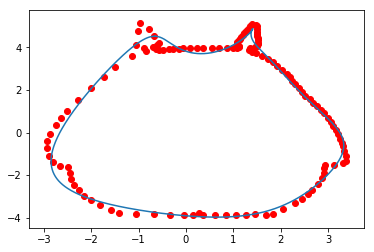

In [15]:
plt.plot(fx, fy)
plt.scatter(bodyx, bodyy, c='r')

In [16]:
def drawbody(n=5):
    xa0, xaseq, xbseq = fourier(bodyx, n=n)
    ya0, yaseq, ybseq = fourier(bodyy, n=n)
    fx = fser(xa0, xaseq, xbseq, tarr)
    fy = fser(ya0, yaseq, ybseq, tarr)
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.plot(fx, fy);
    plt.scatter(bodyx, bodyy, c='r');

好像真的可以哦! 我們再來用互動的方式試試!

In [17]:
from ipywidgets import interact

In [18]:
interact(drawbody, n=(5,20))

interactive(children=(IntSlider(value=5, description='n', max=20, min=5), Output()), _dom_classes=('widget-int…

<function __main__.drawbody(n=5)>

### 更完整的

In [19]:
leye = np.array([(-0.783793952384612, 3.30577195074796), (-0.873847982822986, 3.28666958065497), (-0.942070733155088, 3.24300702044243), (-1.00756457347390, 3.17478427011032), (-1.04849822367316, 3.10110369975166), (-1.08124514383257, 3.00832075930000), (-1.07032950377944, 2.91280890883506), (-1.03485367360674, 2.83912833847639), (-0.972088743301212, 2.78455013821071), (-0.887492532889407, 2.75180321805130), (-0.800167412464317, 2.75726103807787), (-0.707384472012659, 2.79819468827713), (-0.620059351587569, 2.86368852859594), (-0.570938971348456, 2.96192928907417), (-0.549107691242183, 3.08745914968524), (-0.600000000000002, 3.20000000000000), (-0.652806271746978, 3.26483830054870), (-0.718300112065795, 3.30031413072139)])

In [20]:
reye = np.array([(1.22741272740574, 3.32214541082766), (1.16464779710021, 3.30031413072139), (1.12371414690095, 3.25938048052213), (1.07732267667512, 3.21298901029630), (1.04730466652899, 3.16932645008376), (1.03093120644929, 3.11747715983136), (1.03911793648914, 3.05471222952583), (1.04730466652899, 2.99194729922029), (1.08005158668840, 2.92918236891476), (1.12644305691423, 2.87187525863580), (1.20000000000000, 2.80000000000000), (1.28199092767142, 2.76817667813100), (1.40206296825592, 2.77363449815757), (1.50030372873415, 2.83094160843654), (1.55761083901311, 2.91553781884834), (1.57398429909281, 3.02469421937970), (1.53577955890684, 3.13385061991106), (1.49484590870758, 3.20753119026973), (1.40752078828249, 3.28394067064169), (1.32019566785740, 3.32214541082766)])

In [21]:
leyex = leye[:,0]
leyey = leye[:,1]

In [22]:
reyex = reye[:,0]
reyey = reye[:,1]

In [23]:
lball = np.array([(-0.878350081874105, 3.10434262172323), (-0.897226953249471, 3.07225194038511), (-0.910440763212228, 3.02317207480915), (-0.902890014662081, 2.98164295778335), (-0.863248584773811, 2.94955227644522), (-0.817944093472931, 2.93822615362000), (-0.765088853621904, 2.96087839927044), (-0.734885859421317, 3.00051982915871), (-0.731110485146244, 3.06470119183496), (-0.759425792209294, 3.11566874454845), (-0.802842596372638, 3.13643330306135), (-0.842484026260908, 3.13077024164874)])

In [24]:
lballx = lball[:,0]
lbally = lball[:,1]

In [25]:
rball = np.array([(1.24431133650858, 2.96286361480221), (1.30151528554477, 2.95985288064241), (1.34216019670205, 2.98845485516050), (1.37226753830005, 3.02759439923789), (1.37979437369954, 3.08780908243387), (1.32861189298296, 3.13447546191076), (1.28044014642617, 3.14802376562986), (1.22925766570958, 3.12845399359116), (1.20000000000000, 3.10000000000000), (1.19162348871209, 3.03813196879719), (1.20000000000000, 3.00000000000000)])

In [26]:
rballx = rball[:,0]
rbally = rball[:,1]

In [27]:
nose = np.array([(-0.102992200001562, 2.94931531108311), (-0.0593365546844738, 2.92221870364492), (-0.00965944104778692, 2.91770260240522), (0.0460391409084983, 2.91920796948512), (0.103243089944683, 2.92071333656502), (0.149909469421571, 2.90264893160622), (0.199586583058258, 2.88608989372733), (0.249263696694944, 2.88157379248763), (0.300000000000000, 2.90000000000000), (0.341091088568820, 2.90867039992582), (0.393778936365306, 2.92522943780472), (0.434423847522595, 2.92071333656502), (0.491627796558781, 2.92071333656502), (0.551842479754765, 2.92372407072482), (0.593992757991954, 2.94780994400321), (0.562380049314063, 2.98092801976100), (0.500000000000002, 3.00000000000000), (0.438939948762294, 3.02157293091829), (0.380230632646210, 3.03211050047759), (0.330553519009523, 3.03512123463739), (0.274854937053238, 3.03512123463739), (0.234210025895948, 3.03662660171729), (0.186038279339161, 3.03662660171729), (0.145393368181872, 3.02909976631779), (0.0972216216250849, 3.02759439923789), (0.0565767104677956, 3.02157293091829), (0.00000000000000, 3.00000000000000), (-0.0442828838854777, 2.99447632348010), (-0.0743902254834699, 2.97942265268110)])

In [28]:
nosex = nose[:,0]
nosey = nose[:,1]

In [29]:
belly = np.array([(-0.00218697637121534, 1.81832058439717), (-0.399647666807591, 1.74038711568415), (-0.875041825956982, 1.58452017825813), (-1.33484929136377, 1.40527320021819), (-1.47512953504719, 1.28837299714867), (-1.73230998180014, 1.03898589726703), (-1.90376361296878, 0.719458675543671), (-2.00000000000000, 0.500000000000002), (-2.17653075346433, 0.166131047681270), (-2.27005091591995, -0.137809480299485), (-2.30901765027645, -0.426163314537638), (-2.34019103776166, -0.737897189389694), (-2.34019103776166, -1.08080445172695), (-2.34019103776166, -1.36136493909381), (-2.31681099714775, -1.67309881394586), (-2.23887752843474, -1.96145264818401), (-2.12977067223652, -2.19525305432306), (-1.98949042855309, -2.38229337923429), (-1.77907006302795, -2.61609378537333), (-1.62320312560192, -2.79534076341326), (-1.43616280069069, -2.98238108832450), (-1.22574243516555, -3.14604137262183), (-0.984148682155202, -3.27852826943395), (-0.773728316630062, -3.34866839127566), (-0.500000000000002, -3.50000000000000), (-0.298334157480671, -3.59805549115731), (-0.0489470575990243, -3.67598895987032), (0.177060001668719, -3.73054238796943), (0.473207182778175, -3.66040226612772), (0.800527751372838, -3.55908875680080), (1.04991485125448, -3.40322181937477), (1.28371525739353, -3.27852826943395), (1.48634227604737, -3.09148794452272), (1.73572937592901, -2.93562100709669), (1.93835639458285, -2.74858068218546), (2.17995014759320, -2.49140023543251), (2.35140377876183, -2.22642644180826), (2.48389067557396, -1.92248591382751), (2.59299753177218, -1.63413207958935), (2.61637757238608, -1.36915828596511), (2.66313765361389, -1.08859779859826), (2.68651769422779, -0.737897189389694), (2.64755095987129, -0.488510089508049), (2.59299753177218, -0.207949602141197), (2.51506406305916, 0.0726108852256533), (2.42933724747484, 0.384344760077709), (2.32023039127662, 0.664905247444561), (2.19553684133580, 0.867532266098398), (2.07084329139498, 1.07015928475223), (1.89159631335504, 1.28057965027737), (1.65000256034470, 1.42085989396080), (1.41620215420565, 1.52217340328771), (1.13564166683880, 1.64686695322854), (0.831701138858044, 1.72480042194155), (0.519967264005984, 1.80273389065457), (0.278373510995638, 1.82611393126847)])

In [30]:
bellyx = belly[:,0]
bellyy = belly[:,1]

In [31]:
patternA = np.array([(-1.58351209383478, 0.730186034507250), (-1.45742490217856, 0.929824087962930), (-1.28405501365125, 1.06641854559050), (-1.12119239109530, 1.02964311469077), (-0.989851566453409, 0.893048657063199), (-1.11068512512395, 0.882541391091848), (-1.26829411469423, 0.893048657063199), (-1.39438130635045, 0.824751428249414)])

In [32]:
pAx = patternA[:,0]
pAy = patternA[:,1]

In [33]:
patternB = np.array([(-0.606336358499073, 1.05065764663347), (-0.522278230728260, 1.18199847127537), (-0.411951938029066, 1.26605659904618), (-0.228074783530412, 1.40265105667375), (-0.0967339588885164, 1.31333929591726), (0.0135923338106762, 1.21352026918942), (0.0608750306817587, 1.10319397649023), (-0.0704657939601372, 1.11370124246158), (-0.233328416516088, 1.19250573724672), (-0.385683773100687, 1.13996940738996), (-0.464488267885824, 1.08743307753320)])

In [34]:
pBx = patternB[:,0]
pBy = patternB[:,1]

In [35]:
patternC = np.array([(0.486419302521502, 1.12420850843293), (0.586238329249343, 1.26605659904618), (0.701818254934211, 1.36062199278834), (0.775369116733673, 1.41315832264510), (0.901456308389893, 1.33960746084564), (1.01178260108908, 1.25554933307483), (1.07482619691719, 1.16098393933266), (1.10109436184557, 1.06641854559050), (0.969753537203678, 1.11895487544726), (0.806890914647728, 1.20301300321807), (0.644028292091777, 1.12420850843293)])

In [36]:
pCx = patternC[:,0]
pCy = patternC[:,1]

In [37]:
patternD = np.array([(1.54837660735524, 0.946137677976713), (1.61632947623207, 1.06392265069654), (1.73411444895190, 1.18170762341637), (1.82924846537945, 1.10016418076418), (1.90173152551473, 1.00956035559508), (1.95156362935773, 0.937077295459803), (1.96515420313310, 0.837413087773794), (1.87002018670554, 0.882715000358344), (1.72052387517653, 0.991439590561263)])

In [38]:
pDx = patternD[:,0]
pDy = patternD[:,1]

In [39]:
patternE = np.array([(-2.02594429556575, -0.236242240480032), (-1.98064238298120, -0.0686251639171986), (-1.89003855781210, 0.0672805738364504), (-1.80000000000000, 0.200000000000000), (-1.65899880363090, 0.126173060196365), (-1.54574402216952, 0.0355692350272655), (-1.50497230084343, -0.0731553551756536), (-1.62275727356326, -0.0505043988833788), (-1.73148186376618, -0.0369138251080138), (-1.86285741026137, -0.132047841535568)])

In [40]:
pEx = patternE[:,0]
pEy = patternE[:,1]

In [41]:
patternF = np.array([(-1.15614757394239, -0.0278534425911039), (-1.09725508758248, 0.135233442713275), (-0.993060688638015, 0.280199562983833), (-0.848094568367455, 0.402514726962117), (-0.725779404389170, 0.343622240602203), (-0.653296344253890, 0.266608989208468), (-0.600000000000002, 0.200000000000000), (-0.544571754050970, 0.121642868937910), (-0.675947300546165, 0.121642868937910), (-0.825443612075180, 0.166944781522459), (-0.952288967311920, 0.0808711476118152), (-1.03836260122256, 0.0129182787349908)])

In [42]:
pFx = patternF[:,0]
pFy = patternF[:,1]

In [43]:
patternG = np.array([(-0.0870224369470150, 0.180535355297824), (0.0217021532559050, 0.357212814377568), (0.130426743458825, 0.493118552131217), (0.252741907437110, 0.579192186041862), (0.411298601483035, 0.502178934648127), (0.501902426652135, 0.393454344445207), (0.560794913012051, 0.320971284309928), (0.600000000000002, 0.200000000000000), (0.456600514067586, 0.257548606691559), (0.275392863729385, 0.320971284309928), (0.125896552200370, 0.253018415433104)])

In [44]:
pGx = patternG[:,0]
pGy = patternG[:,1]

In [45]:
patternH = np.array([(0.986632891306820, 0.130703251454820), (1.07270652521746, 0.284729754242288), (1.20000000000000, 0.400000000000000), (1.35810857450013, 0.506709125906582), (1.48042373847841, 0.416105300737482), (1.54384641609678, 0.316441093051473), (1.60000000000000, 0.200000000000000), (1.58914832868133, 0.0989919126456351), (1.48495392973687, 0.162414590264004), (1.34451800072476, 0.239427841657739), (1.17237073290347, 0.189595737814734)])

In [46]:
pHx = patternH[:,0]
pHy = patternH[:,1]

In [47]:
patternI = np.array([(1.78394655279490, 0.0899315301287252), (1.87002018670554, 0.221307076623919), (2.02404668949301, 0.320971284309928), (2.14636185347130, 0.194125929073189), (2.20072414857276, 0.0763409563533603), (2.22790529612349, -0.0142628688157390), (2.23696567864040, -0.150168606569388), (2.12824108843748, -0.0187930600741940), (2.02404668949301, 0.0672805738364504), (1.88814095173936, 0.0718107650949053)])

In [48]:
pIx = patternI[:,0]
pIy = patternI[:,1]

In [49]:
lclaw = np.array([(-1.40000000000000, -3.80000000000000), (-1.59625077997738, -3.87125486898149), (-1.41619346231386, -3.86675343603990), (-1.23613614465034, -3.84424627133196), (-1.29915620583257, -3.88926060074784), (-1.15511035170176, -3.88475916780625), (-1.04257452816206, -3.88025773486466), (-0.966050168155064, -3.87575630192308), (-1.07333507478555, -3.92667253818025), (-0.952361895190273, -3.92398424530036), (-0.839453594234680, -3.90516619514109), (-0.723857000399192, -3.89441302362151), (-0.619013578083284, -3.88097155922204), (-0.764181393597618, -3.85677692330298), (-0.898596037592371, -3.83795887314372), (-1.07333507478555, -3.82720570162413), (-1.20000000000000, -3.80000000000000)])

In [50]:
lclawx = lclaw[:,0]
lclawy = lclaw[:,1]

In [51]:
rclaw = np.array([(0.894657291965626, -3.88580827901845), (1.02937381942239, -3.90451890783189), (1.15286396959109, -3.92697166240802), (1.33622813196280, -3.96065079427221), (1.28009624552248, -3.90077678206920), (1.39610214416580, -3.91574528511995), (1.58695055806289, -3.95316654274683), (1.53456079738525, -3.90077678206920), (1.66553519907933, -3.90826103359458), (1.83018873263760, -3.91200315935726), (1.75908834314653, -3.87083977596770), (1.66927732484202, -3.84090276986619), (1.54578717467332, -3.84090276986619), (1.39236001840311, -3.84838702139157), (1.23519073637022, -3.85587127291695), (1.11170058620152, -3.86335552444232), (0.991952561795511, -3.87083977596770)])

In [52]:
rclawx = rclaw[:,0]
rclawy = rclaw[:,1]

In [53]:
def drawbird(身=5, 眼=5, 眼珠=5, 鼻=5, 肚=5, 紋=5, 爪=5):
    bxa0, bxaseq, bxbseq = fourier(bodyx, n=身)
    bya0, byaseq, bybseq = fourier(bodyy, n=身)
    bfx = fser(bxa0, bxaseq, bxbseq, tarr)
    bfy = fser(bya0, byaseq, bybseq, tarr)
    # Left Eye
    lxa0, lxaseq, lxbseq = fourier(leyex, n=眼)
    lya0, lyaseq, lybseq = fourier(leyey, n=眼)
    lfx = fser(lxa0, lxaseq, lxbseq, tarr)
    lfy = fser(lya0, lyaseq, lybseq, tarr)
    # Right Eye
    rxa0, rxaseq, rxbseq = fourier(reyex, n=眼)
    rya0, ryaseq, rybseq = fourier(reyey, n=眼)
    rfx = fser(rxa0, rxaseq, rxbseq, tarr)
    rfy = fser(rya0, ryaseq, rybseq, tarr)
    # left eye ball
    lbxa0, lbxaseq, lbxbseq = fourier(lballx, n=眼珠)
    lbya0, lbyaseq, lbybseq = fourier(lbally, n=眼珠)
    lbfx = fser(lbxa0, lbxaseq, lbxbseq, tarr)
    lbfy = fser(lbya0, lbyaseq, lbybseq, tarr)
    # right eye ball
    rbxa0, rbxaseq, rbxbseq = fourier(rballx, n=眼珠)
    rbya0, rbyaseq, rbybseq = fourier(rbally, n=眼珠)
    rbfx = fser(rbxa0, rbxaseq, rbxbseq, tarr)
    rbfy = fser(rbya0, rbyaseq, rbybseq, tarr)
    # nose
    nxa0, nxaseq, nxbseq = fourier(nosex, n=鼻)
    nya0, nyaseq, nybseq = fourier(nosey, n=鼻)
    nfx = fser(nxa0, nxaseq, nxbseq, tarr)
    nfy = fser(nya0, nyaseq, nybseq, tarr)
    # belly
    bexa0, bexaseq, bexbseq = fourier(bellyx, n=肚)
    beya0, beyaseq, beybseq = fourier(bellyy, n=肚)
    befx = fser(bexa0, bexaseq, bexbseq, tarr)
    befy = fser(beya0, beyaseq, beybseq, tarr)
    # pattern
    pAxa0, pAxaseq, pAxbseq = fourier(pAx, n=紋)
    pAya0, pAyaseq, pAybseq = fourier(pAy, n=紋)
    pAfx = fser(pAxa0, pAxaseq, pAxbseq, tarr)
    pAfy = fser(pAya0, pAyaseq, pAybseq, tarr)
    # 
    pBxa0, pBxaseq, pBxbseq = fourier(pBx, n=紋)
    pBya0, pByaseq, pBybseq = fourier(pBy, n=紋)
    pBfx = fser(pBxa0, pBxaseq, pBxbseq, tarr)
    pBfy = fser(pBya0, pByaseq, pBybseq, tarr)
    # 
    pCxa0, pCxaseq, pCxbseq = fourier(pCx, n=紋)
    pCya0, pCyaseq, pCybseq = fourier(pCy, n=紋)
    pCfx = fser(pCxa0, pCxaseq, pCxbseq, tarr)
    pCfy = fser(pCya0, pCyaseq, pCybseq, tarr)
    # 
    pDxa0, pDxaseq, pDxbseq = fourier(pDx, n=紋)
    pDya0, pDyaseq, pDybseq = fourier(pDy, n=紋)
    pDfx = fser(pDxa0, pDxaseq, pDxbseq, tarr)
    pDfy = fser(pDya0, pDyaseq, pDybseq, tarr)
    # 
    pExa0, pExaseq, pExbseq = fourier(pEx, n=紋)
    pEya0, pEyaseq, pEybseq = fourier(pEy, n=紋)
    pEfx = fser(pExa0, pExaseq, pExbseq, tarr)
    pEfy = fser(pEya0, pEyaseq, pEybseq, tarr)
    # 
    pFxa0, pFxaseq, pFxbseq = fourier(pFx, n=紋)
    pFya0, pFyaseq, pFybseq = fourier(pFy, n=紋)
    pFfx = fser(pFxa0, pFxaseq, pFxbseq, tarr)
    pFfy = fser(pFya0, pFyaseq, pFybseq, tarr)
    # 
    pGxa0, pGxaseq, pGxbseq = fourier(pGx, n=紋)
    pGya0, pGyaseq, pGybseq = fourier(pGy, n=紋)
    pGfx = fser(pGxa0, pGxaseq, pGxbseq, tarr)
    pGfy = fser(pGya0, pGyaseq, pGybseq, tarr)
    # 
    pHxa0, pHxaseq, pHxbseq = fourier(pHx, n=紋)
    pHya0, pHyaseq, pHybseq = fourier(pHy, n=紋)
    pHfx = fser(pHxa0, pHxaseq, pHxbseq, tarr)
    pHfy = fser(pHya0, pHyaseq, pHybseq, tarr)
    # 
    pIxa0, pIxaseq, pIxbseq = fourier(pIx, n=紋)
    pIya0, pIyaseq, pIybseq = fourier(pIy, n=紋)
    pIfx = fser(pIxa0, pIxaseq, pIxbseq, tarr)
    pIfy = fser(pIya0, pIyaseq, pIybseq, tarr)
    # Left Claw
    lcxa0, lcxaseq, lcxbseq = fourier(lclawx, n=爪)
    lcya0, lcyaseq, lcybseq = fourier(lclawy, n=爪)
    lcfx = fser(lcxa0, lcxaseq, lcxbseq, tarr)
    lcfy = fser(lcya0, lcyaseq, lcybseq, tarr)
    # Right Claw
    rcxa0, rcxaseq, rcxbseq = fourier(rclawx, n=爪)
    rcya0, rcyaseq, rcybseq = fourier(rclawy, n=爪)
    rcfx = fser(rcxa0, rcxaseq, rcxbseq, tarr)
    rcfy = fser(rcya0, rcyaseq, rcybseq, tarr)
    #
    #
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.plot(bfx, bfy, c='b');
    plt.plot(lfx, lfy, c='b');
    plt.plot(rfx, rfy, c='b');
    plt.plot(lbfx, lbfy, c='b');
    plt.plot(rbfx, rbfy, c='b');
    plt.plot(nfx, nfy, c='b');
    plt.plot(befx, befy, c='b');
    plt.plot(pAfx, pAfy, c='b');
    plt.plot(pBfx, pBfy, c='b');
    plt.plot(pCfx, pCfy, c='b');
    plt.plot(pDfx, pDfy, c='b');
    plt.plot(pEfx, pEfy, c='b');
    plt.plot(pFfx, pFfy, c='b');
    plt.plot(pGfx, pGfy, c='b');
    plt.plot(pHfx, pHfy, c='b');
    plt.plot(pIfx, pIfy, c='b');
    plt.plot(lcfx, lcfy, c='b');
    plt.plot(rcfx, rcfy, c='b');

In [55]:
interact(drawbird, 身=(5,50), 眼=(5,20),  眼珠=(5,20), 鼻=(5,20), 肚=(5,20), 紋=(5,20), 爪=(5,20))

interactive(children=(IntSlider(value=5, description='身', max=50, min=5), IntSlider(value=5, description='眼', …

<function __main__.drawbird(身=5, 眼=5, 眼珠=5, 鼻=5, 肚=5, 紋=5, 爪=5)>

As in [Making Formulas for Everything](http://blog.wolfram.com/2013/05/17/making-formulas-for-everything-from-pi-to-the-pink-panther-to-sir-isaac-newton/), we can actually com